<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Missing_eGFR%26slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable(ยังไม่ตัด).xlsx')

In [93]:
df.head()

,Unnamed: 0,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),LabLocation,LabCwhen
0,0,924852,2.63,15.8,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,1,989278,2.03,32.3,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2,2103792,1.05,55.9,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,3,953611,1.03,51.1,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,4,488150,1.94,32.6,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377


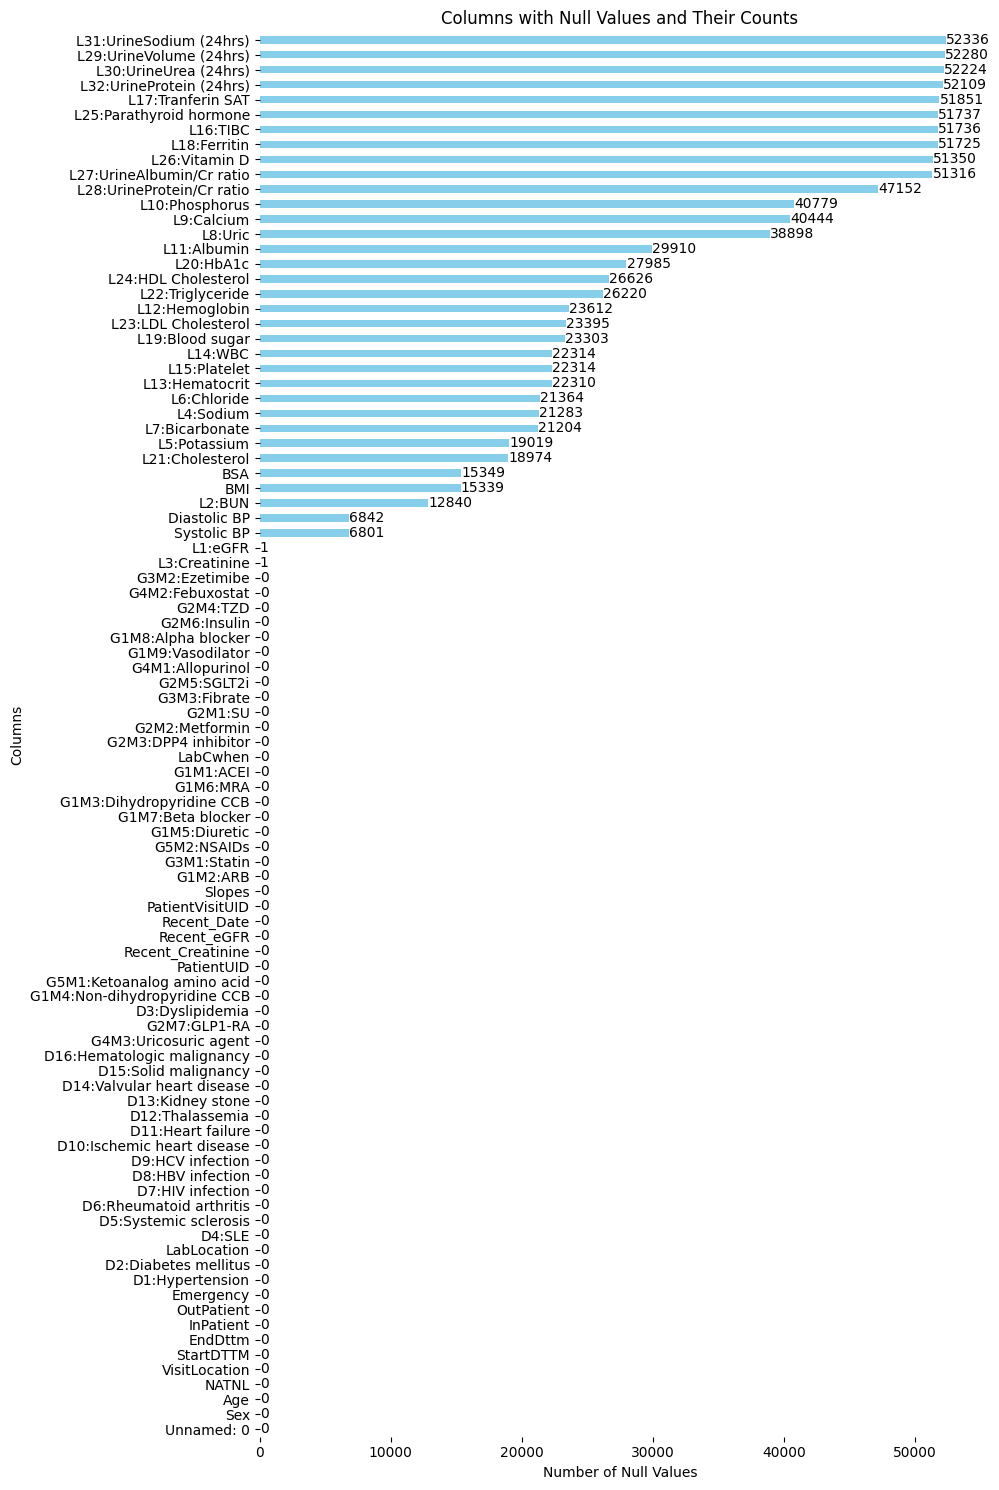

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()

In [95]:
df.shape #ข้อมูลทั้งหมดมี 94 columns , 52620 rows

(52620, 94)

In [96]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "Unnamed: 0", "PatientUID", "Slopes", "Recent_eGFR"
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin([ "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
stage = df[missing_columns]
stage.head() #36 คอลัมน์ที่มีค่าว่าง

,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


#แบ่งระยะตาม eGFR

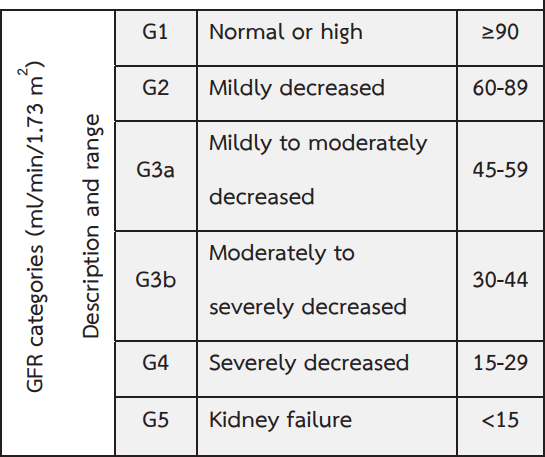

In [97]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'ระยะที่ 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'ระยะที่ 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'ระยะที่ 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'ระยะที่ 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'ระยะที่ 4'
    else:
        return 'ระยะที่ 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
stage['eGFR_Category'] = stage['Recent_eGFR'].apply(categorize_eGFR)
stage.head()

<ipython-input-97-be4a93251d06>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage['eGFR_Category'] = stage['Recent_eGFR'].apply(categorize_eGFR)


,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),eGFR_Category
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 4
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3b
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3a
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3a
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ระยะที่ 3b


In [98]:
#เรียงให้คอลัมน์  'Unnamed: 0', 'PatientUID', 'Slopes', 'eGFR_Category' มาอยู่ด้านหน้า
column_order = ['PatientUID', 'Slopes', 'Recent_eGFR','eGFR_Category'] + [col for col in stage.columns if col not in ['PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category']]
stage = stage[column_order]
stage.head()

,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,2.754717,15.8,ระยะที่ 4,NaN,NaN,53.0,131.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,-46.720000,32.3,ระยะที่ 3b,18.71,1.70,71.0,121.0,80.3,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,11.018868,55.9,ระยะที่ 3a,23.56,1.47,93.0,143.0,44.7,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,17.222520,51.1,ระยะที่ 3a,27.50,1.41,60.0,120.0,33.5,28.9,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,-79.002653,32.6,ระยะที่ 3b,NaN,NaN,NaN,NaN,114.2,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [126]:
# คำนวณเปอร์เซ็นต์ของค่าว่างทั้งหมดแยกตาม 'eGFR_Category'
missing_by_category = stage.groupby('eGFR_Category').apply(lambda x: round(x.isnull().mean().mean() * 100, 2))
missing_by_category

eGFR_Category
ระยะที่ 1     51.48
ระยะที่ 2     52.99
ระยะที่ 3a    52.74
ระยะที่ 3b    51.43
ระยะที่ 4     48.75
ระยะที่ 5     46.74
dtype: float64

In [99]:
#จากมากไปน้อย
stage_sort = stage.sort_values(by='Recent_eGFR', ascending=False)
stage_sort

,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
51783,553538,0.058871,140.75,ระยะที่ 1,18.88,1.20,68.0,108.0,142.68,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51784,553538,-51.636256,140.75,ระยะที่ 1,NaN,NaN,67.0,103.0,142.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5319,2384626,0.795640,125.93,ระยะที่ 1,NaN,NaN,99.0,144.0,108.50,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5318,2384626,7.984375,125.93,ระยะที่ 1,23.31,1.54,93.0,132.0,100.10,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,2384626,79.441176,125.93,ระยะที่ 1,NaN,NaN,86.0,152.0,42.50,42.7,...,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14354,995791,0.197297,1.05,ระยะที่ 5,29.75,1.88,63.0,155.0,10.00,70.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14355,995791,-2.553202,1.05,ระยะที่ 5,29.02,1.86,61.0,178.0,10.20,64.6,...,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14353,995791,-0.494580,1.05,ระยะที่ 5,30.12,1.89,76.0,155.0,10.50,48.5,...,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14352,995791,-4.615925,1.05,ระยะที่ 5,31.21,1.94,76.0,147.0,15.90,45.9,...,155.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

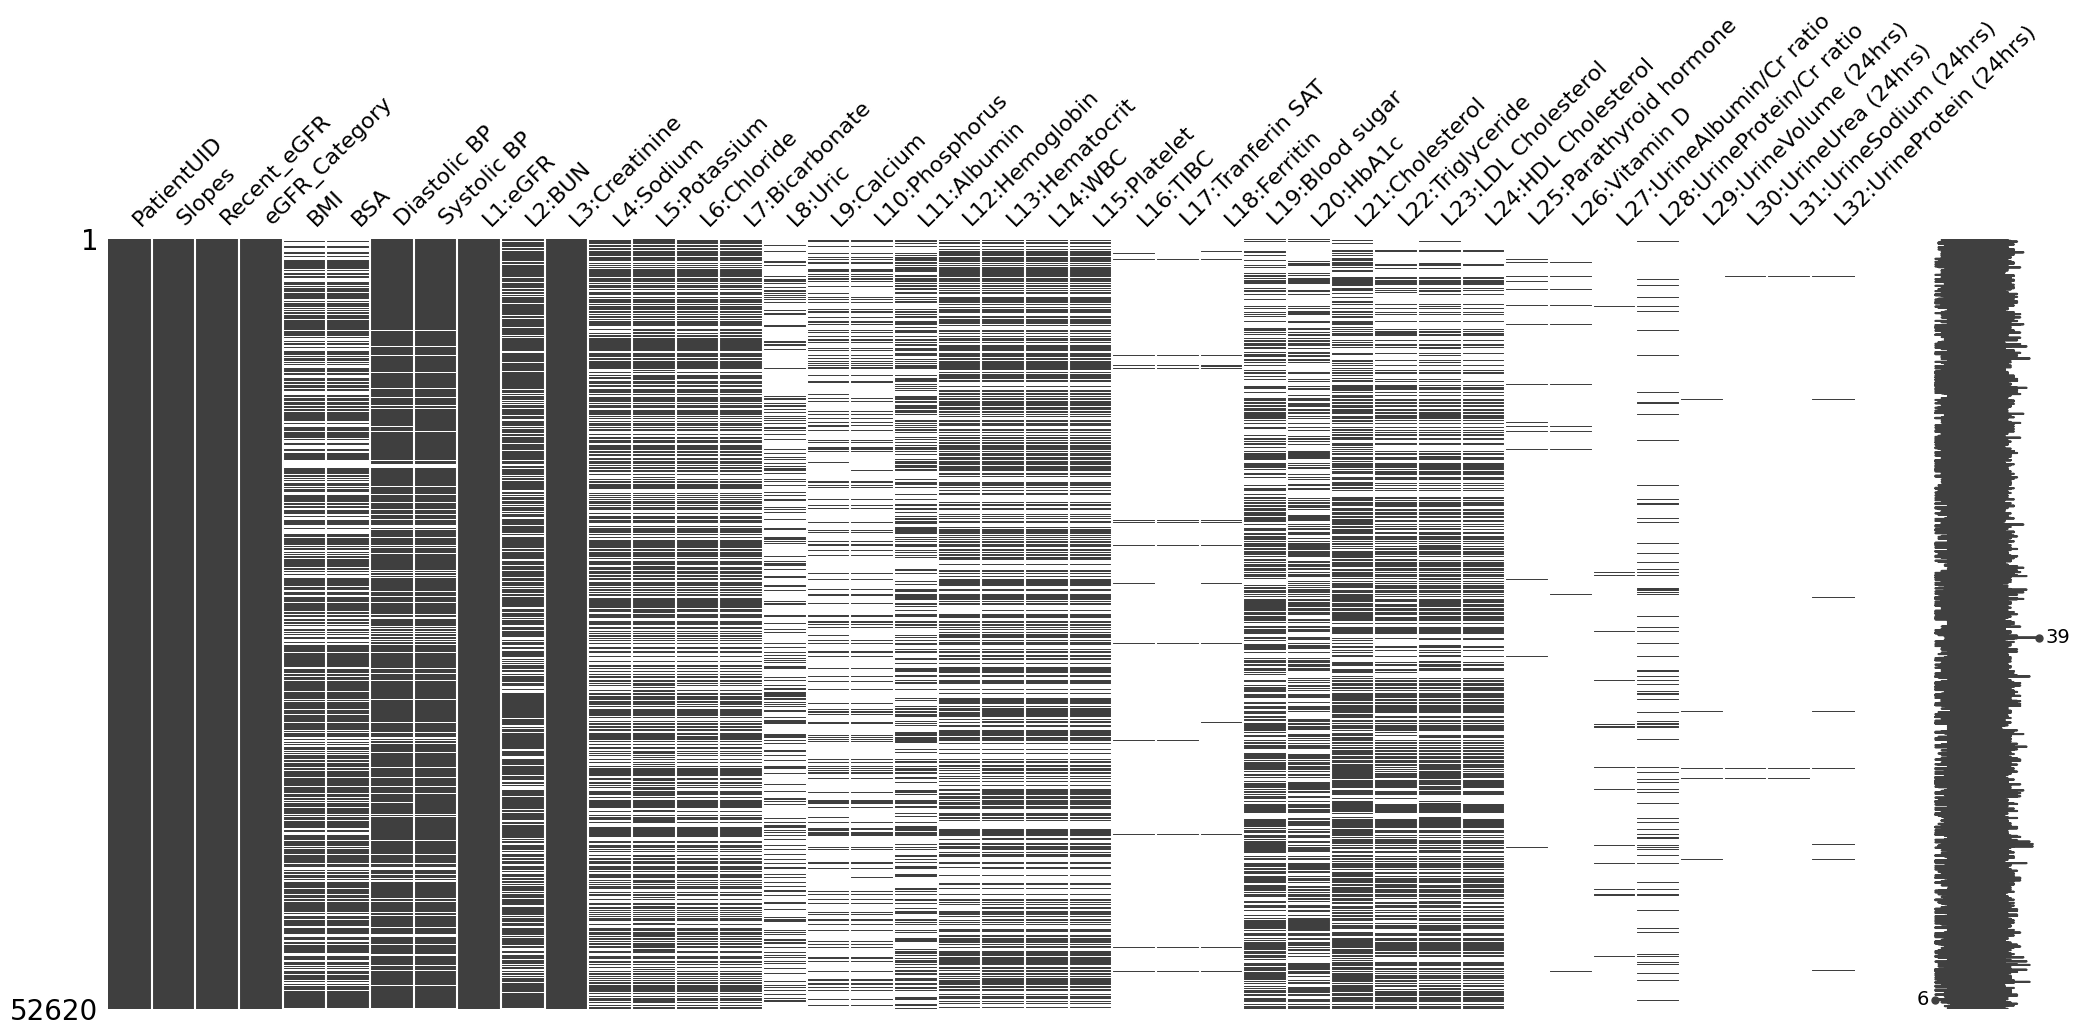

In [100]:
import missingno as msno
msno.matrix(stage)

In [102]:
#ทำการเเปลงคอลัมน์ที่ไม่มีค่าว่าง = 0, มีค่าว่าง = 1
columns_to_convert = ['BMI', 'BSA', 'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
                      'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
                      'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
                      'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
                      'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
                      'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
                      'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
                      'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
                      'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
                      'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)']

# ทำการแปลงค่าในคอลัมน์ที่ต้องการ
stage_sort[columns_to_convert] = stage_sort[columns_to_convert].isnull().astype(int)
stage_sort


,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
51783,553538,0.058871,140.75,ระยะที่ 1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
51784,553538,-51.636256,140.75,ระยะที่ 1,1,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
5319,2384626,0.795640,125.93,ระยะที่ 1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5318,2384626,7.984375,125.93,ระยะที่ 1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5317,2384626,79.441176,125.93,ระยะที่ 1,1,1,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14354,995791,0.197297,1.05,ระยะที่ 5,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
14355,995791,-2.553202,1.05,ระยะที่ 5,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
14353,995791,-0.494580,1.05,ระยะที่ 5,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
14352,995791,-4.615925,1.05,ระยะที่ 5,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1


In [117]:
stage_sort.columns

Index(['PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category', 'BMI', 'BSA',
       'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
       'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
       'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
       'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
       'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
       'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
       'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
       'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
       'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
       'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)'],
      dtype='object')

#แบ่งตามค่า slope

โดยแบ่งออกเป็น
* slope1 คือ >-0.5
* slope2 คือ <=-0.5



In [109]:
df

,Unnamed: 0,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),LabLocation,LabCwhen
0,0,924852,2.63,15.80,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,1,989278,2.03,32.30,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2,2103792,1.05,55.90,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,3,953611,1.03,51.10,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,4,488150,1.94,32.60,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,43763,1.30,55.28,2566-04-10 15:34:20.643,4553420,-4.929870,0,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-10-05 08:55:06.223
52616,52616,43763,1.30,55.28,2566-04-10 15:34:20.643,5674644,16.017287,0,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2561-10-25 09:43:02.440
52617,52617,43763,1.30,55.28,2566-04-10 15:34:20.643,6817059,-24.861814,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2562-11-06 09:08:22.770
52618,52618,43763,1.30,55.28,2566-04-10 15:34:20.643,8004571,4.558175,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2563-12-29 10:39:32.263


In [110]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "PatientUID", "Slopes", "Recent_eGFR"
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin([ "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
slope = df[missing_columns]
slope.head() #36 คอลัมน์ที่มีค่าว่าง

,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [111]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตาม Slopes
def categorize_slope(slope):
    if slope >-0.5:
        return 'slope1'
    else:
        return 'slope2'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
slope['slope_Category'] = slope['Slopes'].apply(categorize_slope)
slope.head()

<ipython-input-111-b5b372dd1877>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope['slope_Category'] = slope['Slopes'].apply(categorize_slope)


,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),slope_Category
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope1
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope2
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope1
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope1
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,slope2


In [112]:
#เรียงให้คอลัมน์  'Unnamed: 0', 'PatientUID', 'Slopes', 'eGFR_Category' มาอยู่ด้านหน้า
column_order = ['PatientUID', 'Slopes', 'slope_Category','Recent_eGFR'] + [col for col in slope.columns if col not in ['PatientUID', 'Slopes', 'slope_Category','Recent_eGFR']]
slope = slope[column_order]
slope.head()

,PatientUID,Slopes,slope_Category,Recent_eGFR,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,2.754717,slope1,15.8,NaN,NaN,53.0,131.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,-46.720000,slope2,32.3,18.71,1.70,71.0,121.0,80.3,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,11.018868,slope1,55.9,23.56,1.47,93.0,143.0,44.7,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,17.222520,slope1,51.1,27.50,1.41,60.0,120.0,33.5,28.9,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,-79.002653,slope2,32.6,NaN,NaN,NaN,NaN,114.2,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [125]:
# คำนวณเปอร์เซ็นต์ของค่าว่างทั้งหมดแยกตาม 'eGFR_Category'
missing_by_category = slope.groupby('slope_Category').apply(lambda x: round(x.isnull().mean().mean() * 100, 2))
missing_by_category

slope_Category
slope1    51.93
slope2    51.92
dtype: float64

In [115]:
#จากน้อยไปมาก
slope_sort = slope.sort_values(by='Slopes', ascending=True)
slope_sort.head()

,PatientUID,Slopes,slope_Category,Recent_eGFR,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
4,488150,-79.002653,slope2,32.60,NaN,NaN,NaN,NaN,114.20,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
51584,1139621,-74.927423,slope2,25.44,NaN,NaN,77.0,185.0,95.40,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4671,515952,-68.120823,slope2,75.50,NaN,NaN,60.0,113.0,125.20,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40820,2136999,-67.941878,slope2,17.01,24.22,1.81,76.0,150.0,101.98,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48577,1582107,-67.405779,slope2,24.08,20.80,1.70,86.0,141.0,77.80,12.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#ทำการเเปลงคอลัมน์ที่ไม่มีค่าว่าง = 0, มีค่าว่าง = 1
columns_to_convert = ['BMI', 'BSA', 'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
                      'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
                      'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
                      'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
                      'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
                      'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
                      'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
                      'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
                      'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
                      'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)']

# ทำการแปลงค่าในคอลัมน์ที่ต้องการ
slope_sort[columns_to_convert] = slope_sort[columns_to_convert].isnull().astype(int)
slope_sort


,PatientUID,Slopes,slope_Category,Recent_eGFR,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
4,488150,-79.002653,slope2,32.60,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
51584,1139621,-74.927423,slope2,25.44,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4671,515952,-68.120823,slope2,75.50,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
40820,2136999,-67.941878,slope2,17.01,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
48577,1582107,-67.405779,slope2,24.08,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26425,2639105,79.001678,slope1,93.50,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5317,2384626,79.441176,slope1,125.93,1,1,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
7654,2033631,90.231395,slope1,8.66,1,1,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
38481,2609014,95.217391,slope1,110.36,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,1,1


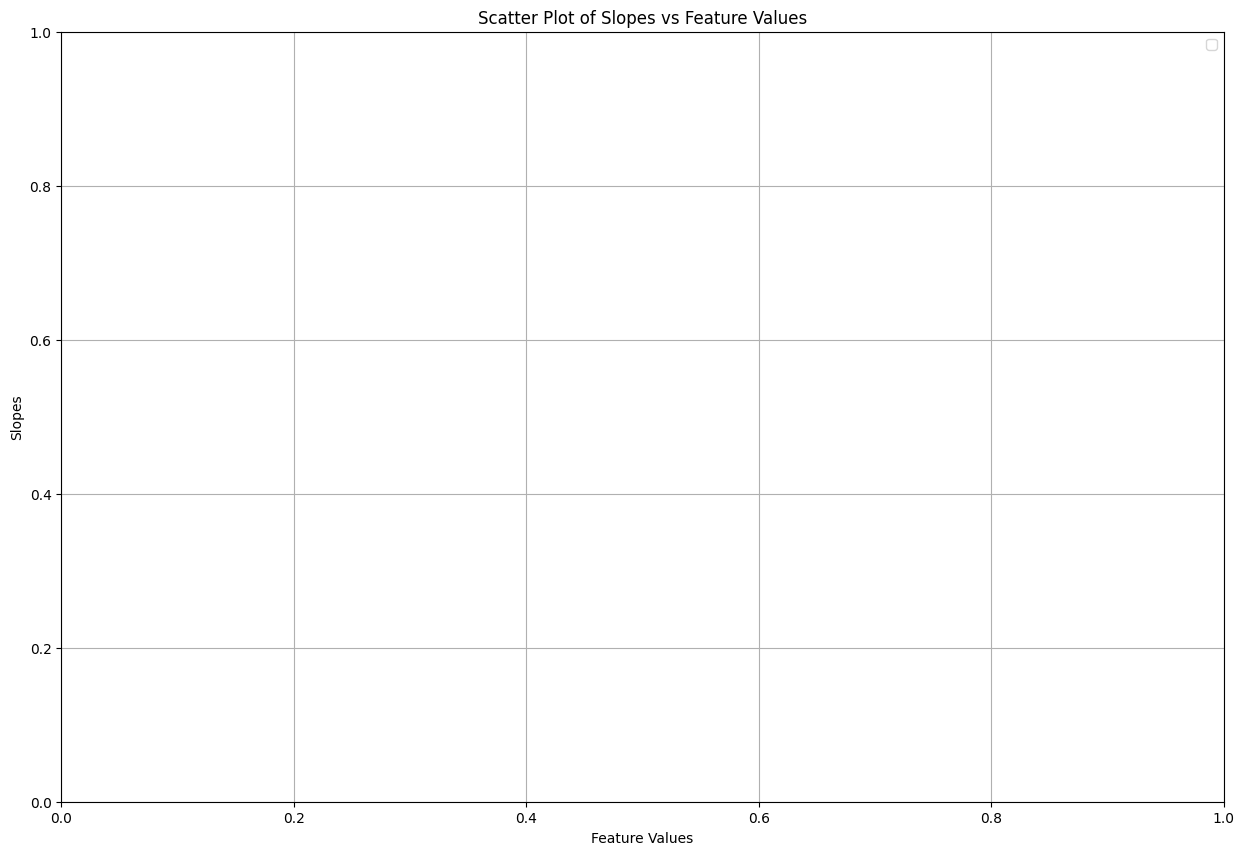

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is the DataFrame that stores the data
# ...

# Sorting the DataFrame by 'Slopes' column
slope_sort = df.sort_values(by='Slopes')

# Create a scatter plot
plt.figure(figsize=(15, 10))

# Loop to create scatter plots for each column
for column in ['BMI', 'BSA', 'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
               'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
               'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
               'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
               'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
               'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
               'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
               'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
               'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
               'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)']:

    x_values = slope_sort[[column]]  # Use double brackets to select a single column as a DataFrame
    y_values = slope_sort['Slopes']



# Set axis labels, title, legend, and show the plot
plt.xlabel('Feature Values')
plt.ylabel('Slopes')
plt.title('Scatter Plot of Slopes vs Feature Values')
plt.legend()
plt.grid(True)
plt.show()
